In [1]:
# Cell 1: Extract Oncology Cohort
import sys
sys.path.append('../src')
from oncology_extractor import extract_oncology_cohort
import matplotlib.pyplot as plt
import seaborn as sns

print("🎯 Extracting oncology cohort...")
patients, diagnoses, summary = extract_oncology_cohort(limit=1000)

print(f"\n📊 COHORT SUMMARY:")
print(f"Total patients: {summary['total_patients']:,}")
print(f"Gender distribution: {summary['demographics']['gender']}")
print(f"Age: {summary['demographics']['age_mean']:.1f} ± {summary['demographics']['age_std']:.1f} years")
print(f"Mortality rate: {summary['mortality']['mortality_rate']:.1%}")



🎯 Extracting oncology cohort...
🔍 Extracting hematologic oncology patients (limit: 1,000)...
✅ Query executed: 1,000 rows returned
✅ Query executed: 3,438 rows returned
📊 Extracted 1,000 patients with 3,438 diagnoses
💾 Saved cohort data:
  - Patients: outputs//oncology_patients.csv
  - Diagnoses: outputs//oncology_diagnoses.csv

📊 COHORT SUMMARY:
Total patients: 1,000
Gender distribution: {'M': 577, 'F': 423}
Age: 65.0 ± 15.4 years
Mortality rate: 40.7%



🔬 MALIGNANCY TYPES:
  Leukemia: 438
  Non-Hodgkin Lymphoma: 324
  Multiple Myeloma: 199
  Hodgkin Lymphoma: 62
  Other Hematologic: 22


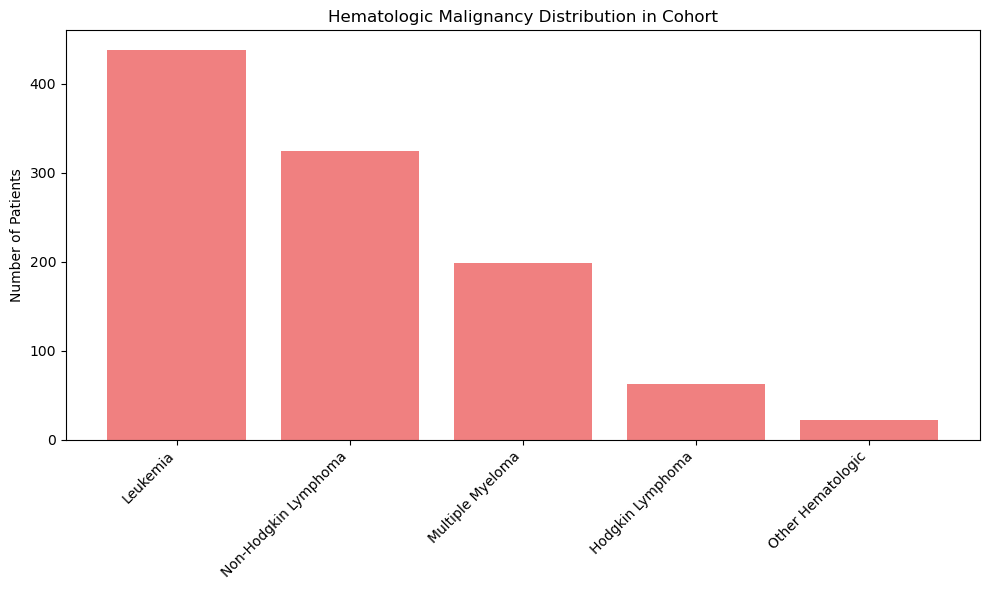

In [2]:
# Cell 2: Analyze Malignancy Distribution
print(f"\n🔬 MALIGNANCY TYPES:")
for malignancy, count in summary['malignancies'].items():
    print(f"  {malignancy}: {count}")

# Visualize malignancy distribution
plt.figure(figsize=(10, 6))
malignancy_names = list(summary['malignancies'].keys())
malignancy_counts = list(summary['malignancies'].values())

plt.bar(malignancy_names, malignancy_counts, color='lightcoral')
plt.title('Hematologic Malignancy Distribution in Cohort')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [3]:
# Cell 3: Sample Patient Profiles
print(f"\n🔍 SAMPLE PATIENT PROFILES:")
sample_patients = patients.head(3)

for idx, (_, patient) in enumerate(sample_patients.iterrows()):
    print(f"\n📋 Patient {idx+1} (ID: {patient['subject_id']}):")
    print(f"  Age: {patient['anchor_age']}, Gender: {patient['gender']}")
    print(f"  Malignancy: {patient['malignancy_types']}")
    print(f"  Admissions: {patient['total_admissions']}")
    
    # Show their diagnoses
    patient_dx = diagnoses[diagnoses['subject_id'] == patient['subject_id']].head(3)
    for _, dx in patient_dx.iterrows():
        print(f"    - {dx['icd_code']}: {dx['malignancy_type']}")

print(f"\n✅ Cohort extraction complete!")
print(f"Data saved in outputs/ directory")


🔍 SAMPLE PATIENT PROFILES:

📋 Patient 1 (ID: 10003400):
  Age: 72, Gender: F
  Malignancy: Multiple Myeloma
  Admissions: 1
    - C9000: Multiple Myeloma

📋 Patient 2 (ID: 10004990):
  Age: 78, Gender: F
  Malignancy: Leukemia
  Admissions: 2
    - C9112: Leukemia
    - C9111: Leukemia

📋 Patient 3 (ID: 10008754):
  Age: 76, Gender: M
  Malignancy: Non-Hodgkin Lymphoma
  Admissions: 3
    - C8330: Non-Hodgkin Lymphoma
    - C8333: Non-Hodgkin Lymphoma
    - C8338: Non-Hodgkin Lymphoma

✅ Cohort extraction complete!
Data saved in outputs/ directory
